In [229]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
# define paths for both files
fpath_depths1 = 'GMdepth1.txt' 
fpath_depths2 = 'GMdepth2.txt' 
# use method 'np.loadtxt' to bring the data into the notebook
depths1_np = np.loadtxt(fpath_depths1)
depths2_np = np.loadtxt(fpath_depths2)

In [230]:
#importing functions for IQR, skew, and kurtosis
from scipy.stats import iqr
from scipy.stats import skew
from scipy.stats import kurtosis

#setting up a table with labels
statistics = ["mean", "std", "median", "mode", "IQR", "skewness", "kurtosis"]

#solving for stats of depth 1
values_1 = [
    np.mean(depths1_np),
    np.std(depths1_np, ddof=1),  
    np.median(depths1_np),
    stats.mode(depths1_np),
    iqr(depths1_np),
    skew(depths1_np),
    kurtosis(depths1_np)
]
#solving for stats of depth 2
values_2 = [
    np.mean(depths2_np),
    np.std(depths2_np, ddof=1), 
    np.median(depths2_np),
    stats.mode(depths2_np),
    iqr(depths2_np),
    skew(depths2_np),
    kurtosis(depths2_np)
]

# putting it all together in a 'dataframe' table
T = pd.DataFrame({"Statistics": statistics, "Depth 1": values_1, "Depth 2":values_2})
print(T)

  Statistics    Depth 1     Depth 2
0       mean  91.080000   96.220000
1        std  14.332552   19.588929
2     median  94.000000   98.000000
3       mode  77.000000  104.000000
4        IQR  19.750000   29.250000
5   skewness  -0.538128   -0.099104
6   kurtosis  -0.431263   -0.835987


<function matplotlib.pyplot.show(close=None, block=None)>

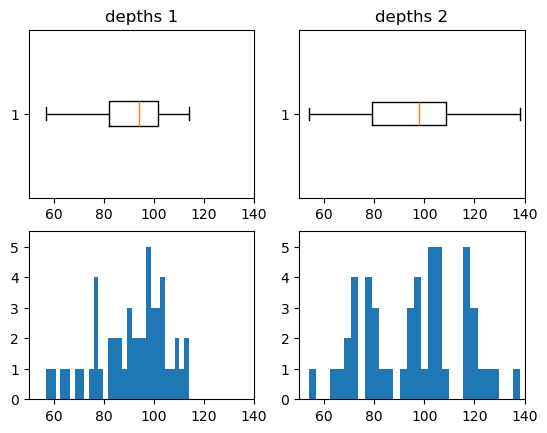

In [231]:
#importing boxplot function
from matplotlib.pyplot import boxplot

#initiating subplot for box plot of depths 1
plt.subplot(2,2,1)
#box plot for depths 1
box1=boxplot(depths1_np,vert=False)
# plot parameters
plt.xlim(50,140)
#labelling
plt.title('depths 1')

#setting place in subplot for box plot of depths 2
plt.subplot(2,2,2)
#box plot for depths 2
box2=boxplot(depths2_np,vert=False,widths=0.28)
#plot parameters
plt.xlim(50,140)
plt.ylim(0,2)
#labelling
plt.title('depths 2')

#importing histogram function
from matplotlib.pyplot import hist

#setting place in subplot for histogram of depths 1
plt.subplot(2,2,3)
#histogram for depths 1
hist1=hist(depths1_np,30)
#plot parameters
plt.xlim(50,140)
plt.ylim(0,5.5)

#setting place in subplot for histogram of depths 2
plt.subplot(2,2,4)
#histogram of depths 2
hist2=hist(depths2_np,30)
#plot parameters
plt.xlim(50,140)
plt.ylim(0,5.5)

#displaying the plot
plt.show


[0.00701754 0.00701754 0.00701754 0.02105263 0.01403509 0.02105263
 0.02105263 0.03859649 0.02105263 0.01754386]
[0.00238095 0.00952381 0.01904762 0.01190476 0.00952381 0.02380952
 0.01428571 0.01904762 0.00714286 0.00238095]


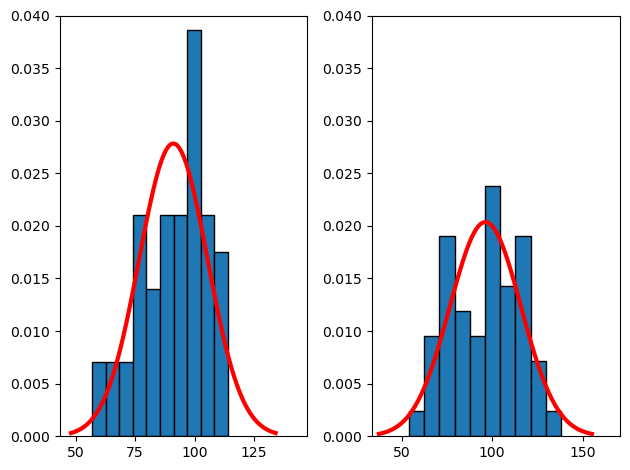

In [232]:
#making a rel density histogram function
def rdh(data):
    """
    LMS 9/3/24
    relative density histogram function
    inputs: data = 1-D dataset array
    outputs: rdh = plot of relative density histogram
    """
    bh, xbins = np.histogram(data, bins=10) #getting array of bin heights and widths
    dx = xbins[1] - xbins[0]  # solving for bin width
    rdh = bh / (sum(bh) * dx)  # relative density histogram
    print(rdh)
    rdh = plt.bar(xbins[:-1] + dx / 2, rdh, width=dx, edgecolor='black')
    return rdh

#making a pdf plotting function
def plotpdf(data):
    """
    LMS 9/3/24
    plotting probability density function
    inputs: data = 1-D data set array
    outputs: plot of pdf
    """
    sig = np.std(data, ddof=1)
    mu = np.mean(data)
    x = np.linspace(mu - 3 * sig, mu + 3 * sig, 100)
    A = 1 / (sig * np.sqrt(2 * np.pi))
    B = (x - mu) ** 2
    C = 2 * sig ** 2
    pdf = A * np.exp(-B / C)
    return plt.plot(x, pdf, 'r', linewidth=3),plt.xlim([0.9*min(x),1.1*max(x)]),plt.ylim([0, 0.04])

#plotting rdh and pdf for depths 1
plt.subplot(1,2,1)
rdh(depths1_np)
plotpdf(depths1_np)

#plotting rdh and pdf for depths 2
plt.subplot(1,2,2)
rdh(depths2_np)
plotpdf(depths2_np)
plt.tight_layout()

In [233]:
#What is the probability of a new measurement at each site being within 20cm of the average value?
#first, whats the average value?
mean1 = np.mean(depths1_np)
mean2 = np.mean(depths2_np)

#whats the average value plus 20? minus 20? lets establish our limits
llim1=mean1-20
llim2=mean2-20
ulim1=mean1+20
ulim2=mean2+20


#so what is the probability of measurement falling between llim and ulim?
#need F(ulim)-F(llim)

#import the integrator
from scipy.integrate import quad

#define pdf function
def pdf(x,data):
    """
    LMS 9/3/24
    plotting probability density function
    inputs: data = 1-D data set array
    outputs: plot of pdf
    """
    sig = np.std(data, ddof=1)
    mu = np.mean(data)
    A = 1 / (sig * np.sqrt(2 * np.pi))
    B = (x - mu) ** 2
    C = 2 * sig ** 2
    pdf = A * np.exp(-B / C)
    return pdf

#define cdf function, F
def cdf(pdf,llim,ulim,data):
    from scipy.integrate import quad
    """
    LMS 9/3/24
    writing function for integrating pdf to get cdf
    inputs: llim = lower limit of integration
    ulim = upper limit of integration
    pdf = probability density funcion
    outputs: cdf = cumulative distribution function
    """
    cdf = quad(pdf,llim,ulim, args=data)
    return cdf[0]


#solve for probability of measurement falling within 20 cm for depth 1
F_upper1 = cdf(pdf,0,ulim1,depths1_np)
F_lower1 = cdf(pdf,0,llim1,depths1_np)
within20_depths1=round((F_upper1-F_lower1),3)

#solve for probability of measurement falling within 20 cm for depth 2
F_upper2 = cdf(pdf,0,ulim2,depths2_np)
F_lower2 = cdf(pdf,0,llim2,depths2_np)
within20_depths2=round((F_upper2-F_lower2),3)


#show off my answers
print("The probability of the measurement falling within 20cm of the average is",within20_depths1,"for depths1.")
print("The probability of the measurement falling within 20cm of the average is",within20_depths2,"for depths2.")

The probability of the measurement falling within 20cm of the average is 0.837 for depths1.
The probability of the measurement falling within 20cm of the average is 0.693 for depths2.


In [234]:
#What is the probability of a new measurement at each site being at least 20cm larger than the average value?
#so what is the probability of a new measurement being greater than previous upper limit?
#find F1 at infinity
Finf1 = cdf(pdf,0,np.inf,depths1_np)
greater20_depths1 = round((Finf1-F_upper1),3)

#find F2 at infinity
Finf2 = cdf(pdf,0,np.inf,depths1_np)
greater20_depths2 = round((Finf2-F_upper2),3)

#show off my answers
print("The probability of the measurement being at least 20cm larger than average is",greater20_depths1,"for depths1.")
print("The probability of the measurement being at least 20cm larger than average is",greater20_depths2,"for depths2.")

The probability of the measurement being at least 20cm larger than average is 0.081 for depths1.
The probability of the measurement being at least 20cm larger than average is 0.154 for depths2.


In [235]:
# What is the probability of a new measurement at each site being at least 20cm smaller than the average value?
#so what is the probability of the measurement being between F at 0 and the previous lower limit?

#difference between F1 at 20 less than average and F1 at 0
less20_depths1 = round((F_lower1-0),3)

#difference between F2 at 20 less than average and F2 at 0
less20_depths2 = round((F_lower2-0),3)

#show off my answers
print("The probability of the measurement being at least 20cm smaller than average is",less20_depths1,"for depths1.")
print("The probability of the measurement being at least 20cm smaller than average is",less20_depths2,"for depths2.")


The probability of the measurement being at least 20cm smaller than average is 0.081 for depths1.
The probability of the measurement being at least 20cm smaller than average is 0.154 for depths2.


In [236]:
#making a rel density histogram function
def rdh1(data):
    """
    LMS 9/3/24
    relative density histogram function
    inputs: data = 1-D dataset array
    outputs: rdh = plot of relative density histogram
    """
    bh, xbins = np.histogram(data, bins=10) #getting array of bin heights and widths
    dx = xbins[1] - xbins[0]  # solving for bin width
    rdh = bh / (sum(bh) * dx)  # relative density histogram
    rdh = plt.bar(xbins[:-1] + dx / 2, rdh, width=dx, edgecolor='black')
    print(xbins)
    return rdh1
    

[ 57.   62.7  68.4  74.1  79.8  85.5  91.2  96.9 102.6 108.3 114. ]


<function __main__.rdh1(data)>

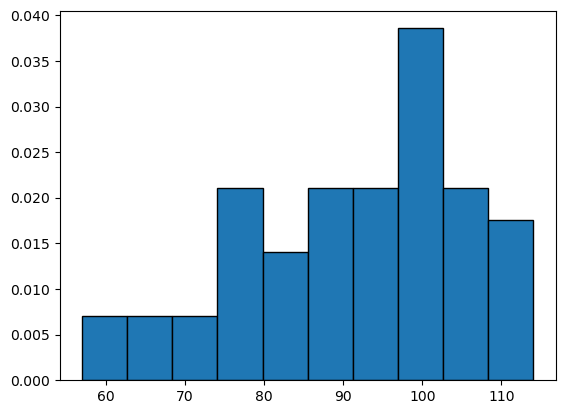

In [237]:
rdh1(depths1_np)